## Prepare the workstation

In [1]:
# Import the necessary libraries for this workbook: Pandas and NumPy. 
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the necessary libraries for visualisations: Pandas and Seaborn. 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Set the maximum column width to display.
pd.options.display.max_colwidth = 200

## Import and sense-check Change 2022 Demographics Data writeback data set

In [3]:
# Import the actual_duration.csv data set as ad.
demographics = pd.read_excel('Change 2022 Demographics Data writeback_091122.xlsx')

# View the DataFrame.
demographics.head()

,Requested URL Path,Campaign,Creative - Size,Audience,Ad Format,Date,Creative - Family,Creative - Version,Platform,Company Name,Impressions,Clicks,Days away from max date,Latest report?
0,NaN,FY23_change_digital_phase3,NaN,General Targetting,Scotsman,2022-06-15,Trade Media Ads,Rate Lock,Trade Media,The Loan Pros Team,1.0,1.0,138.0,0
1,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=8&dateRange.start.day=9&dateRange.end.year=2022&dateRange.end.month=8&dateRange.end.day=15&tim...,Audience 5 - DSC,NaN,5,Single image,2022-08-15,CloseFaster,3steps,LinkedIn,Excellence Real Estate,4.0,0.0,77.0,0
2,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=7&dateRange.start.day=19&dateRange.end.year=2022&dateRange.end.month=7&dateRange.end.day=25&ti...,Audience 1 - Carousel Ads,NaN,1,Carousel,2022-07-25,UnfairAdvantage,All,LinkedIn,South Metro Denver REALTOR Association,3.0,0.0,98.0,0
3,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=5&dateRange.start.day=12&dateRange.end.year=2022&dateRange.end.month=5&dateRange.end.day=18&ca...,Audience 1 - Video,NaN,1,Video,2022-05-18,CloserTwins,ShapeUp,LinkedIn,"Blue Home Loans,",3.0,0.0,166.0,0
4,NaN,4 - StackAdapt - Audio,NaN,4,Audio,2022-05-07,CloserTwins,Cutdown1A,Domain Display,Td Finance,1.0,0.0,177.0,0


In [4]:
# Determine number of rows and columns. 
print(demographics.shape)

(145648, 14)


In [5]:
# Use a docstring to determine the column names.
print(f"The column names of the demographics data set are: {demographics.columns}")

The column names of the demographics data set are: Index(['Requested URL Path', 'Campaign', 'Creative - Size', 'Audience',
       'Ad Format', 'Date', 'Creative - Family', 'Creative - Version',
       'Platform', 'Company Name', 'Impressions', 'Clicks',
       'Days away from max date', 'Latest report?'],
      dtype='object')


In [6]:
# Determine whether there are missing values.
demographics.isna().sum()

Requested URL Path          47844
Campaign                      796
Creative - Size            142372
Audience                        0
Ad Format                      96
Date                            0
Creative - Family           32643
Creative - Version          22640
Platform                        0
Company Name                    1
Impressions                     0
Clicks                          0
Days away from max date         0
Latest report?                  0
dtype: int64

In [7]:
# Determine the metadata of the data set (including data types).
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145648 entries, 0 to 145647
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Requested URL Path       97804 non-null   object        
 1   Campaign                 144852 non-null  object        
 2   Creative - Size          3276 non-null    object        
 3   Audience                 145648 non-null  object        
 4   Ad Format                145552 non-null  object        
 5   Date                     145648 non-null  datetime64[ns]
 6   Creative - Family        113005 non-null  object        
 7   Creative - Version       123008 non-null  object        
 8   Platform                 145648 non-null  object        
 9   Company Name             145647 non-null  object        
 10  Impressions              145648 non-null  float64       
 11  Clicks                   145648 non-null  float64       
 12  Days away from m

In [8]:
# Determine the descriptive statistics of the data set.
demographics.describe()

,Impressions,Clicks,Days away from max date,Latest report?
count,145648.000000,145648.000000,145648.000000,145648.000000
mean,58.699872,0.100111,105.394849,0.062617
std,312.978122,0.726965,61.205936,0.242273
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,56.000000,0.000000
50%,8.000000,0.000000,112.000000,0.000000
75%,23.000000,0.000000,166.000000,0.000000
max,29494.000000,80.000000,213.000000,1.000000


In [9]:
# Find unique values of a column
print(demographics['Ad Format'].unique())

['Scotsman' 'Single image' 'Carousel' 'Video' 'Audio' 'Follower ads'
 'Display' 'Banner' 'No lock campaign' 'Dsc' 'Remarketing' 'Native' 'CPC'
 'Housingwire' 'Display - Interactive' nan
 'Inside_mortgage_finance_newsletter' 'Animated' 'National_mortgage_news'
 'Nmn' 'Interactive']


In [10]:
demographics.head()

,Requested URL Path,Campaign,Creative - Size,Audience,Ad Format,Date,Creative - Family,Creative - Version,Platform,Company Name,Impressions,Clicks,Days away from max date,Latest report?
0,NaN,FY23_change_digital_phase3,NaN,General Targetting,Scotsman,2022-06-15,Trade Media Ads,Rate Lock,Trade Media,The Loan Pros Team,1.0,1.0,138.0,0
1,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=8&dateRange.start.day=9&dateRange.end.year=2022&dateRange.end.month=8&dateRange.end.day=15&tim...,Audience 5 - DSC,NaN,5,Single image,2022-08-15,CloseFaster,3steps,LinkedIn,Excellence Real Estate,4.0,0.0,77.0,0
2,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=7&dateRange.start.day=19&dateRange.end.year=2022&dateRange.end.month=7&dateRange.end.day=25&ti...,Audience 1 - Carousel Ads,NaN,1,Carousel,2022-07-25,UnfairAdvantage,All,LinkedIn,South Metro Denver REALTOR Association,3.0,0.0,98.0,0
3,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=5&dateRange.start.day=12&dateRange.end.year=2022&dateRange.end.month=5&dateRange.end.day=18&ca...,Audience 1 - Video,NaN,1,Video,2022-05-18,CloserTwins,ShapeUp,LinkedIn,"Blue Home Loans,",3.0,0.0,166.0,0
4,NaN,4 - StackAdapt - Audio,NaN,4,Audio,2022-05-07,CloserTwins,Cutdown1A,Domain Display,Td Finance,1.0,0.0,177.0,0


## Decision: Convert "Genereal Targeting" to "6" in Audience column.

In [11]:
# Audience column: Convert text "General Targetting" to Number "6"
demographics['Audience'] = demographics['Audience'].replace(['General Targetting'], '6')

# Print unique values of audience column
print(demographics['Audience'].unique())

['6' '5' '1' '4' '3' '2']


In [12]:
demographics.head()

,Requested URL Path,Campaign,Creative - Size,Audience,Ad Format,Date,Creative - Family,Creative - Version,Platform,Company Name,Impressions,Clicks,Days away from max date,Latest report?
0,NaN,FY23_change_digital_phase3,NaN,6,Scotsman,2022-06-15,Trade Media Ads,Rate Lock,Trade Media,The Loan Pros Team,1.0,1.0,138.0,0
1,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=8&dateRange.start.day=9&dateRange.end.year=2022&dateRange.end.month=8&dateRange.end.day=15&tim...,Audience 5 - DSC,NaN,5,Single image,2022-08-15,CloseFaster,3steps,LinkedIn,Excellence Real Estate,4.0,0.0,77.0,0
2,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=7&dateRange.start.day=19&dateRange.end.year=2022&dateRange.end.month=7&dateRange.end.day=25&ti...,Audience 1 - Carousel Ads,NaN,1,Carousel,2022-07-25,UnfairAdvantage,All,LinkedIn,South Metro Denver REALTOR Association,3.0,0.0,98.0,0
3,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=5&dateRange.start.day=12&dateRange.end.year=2022&dateRange.end.month=5&dateRange.end.day=18&ca...,Audience 1 - Video,NaN,1,Video,2022-05-18,CloserTwins,ShapeUp,LinkedIn,"Blue Home Loans,",3.0,0.0,166.0,0
4,NaN,4 - StackAdapt - Audio,NaN,4,Audio,2022-05-07,CloserTwins,Cutdown1A,Domain Display,Td Finance,1.0,0.0,177.0,0


## Decision: Reallocate 6 Audiences to 3 target groups.
- Audience 1, 2, 3 = Target Group 1
- Audience 4, 5 = Target Group 2
- Audience 6 = Target Group 3

In [13]:
demographics['Target_Groups'] = demographics.loc[:, 'Audience']

demographics.head()

,Requested URL Path,Campaign,Creative - Size,Audience,Ad Format,Date,Creative - Family,Creative - Version,Platform,Company Name,Impressions,Clicks,Days away from max date,Latest report?,Target_Groups
0,NaN,FY23_change_digital_phase3,NaN,6,Scotsman,2022-06-15,Trade Media Ads,Rate Lock,Trade Media,The Loan Pros Team,1.0,1.0,138.0,0,6
1,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=8&dateRange.start.day=9&dateRange.end.year=2022&dateRange.end.month=8&dateRange.end.day=15&tim...,Audience 5 - DSC,NaN,5,Single image,2022-08-15,CloseFaster,3steps,LinkedIn,Excellence Real Estate,4.0,0.0,77.0,0,5
2,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=7&dateRange.start.day=19&dateRange.end.year=2022&dateRange.end.month=7&dateRange.end.day=25&ti...,Audience 1 - Carousel Ads,NaN,1,Carousel,2022-07-25,UnfairAdvantage,All,LinkedIn,South Metro Denver REALTOR Association,3.0,0.0,98.0,0,1
3,https://api.linkedin.com/v2/adAnalyticsV2?q=analytics&dateRange.start.year=2022&dateRange.start.month=5&dateRange.start.day=12&dateRange.end.year=2022&dateRange.end.month=5&dateRange.end.day=18&ca...,Audience 1 - Video,NaN,1,Video,2022-05-18,CloserTwins,ShapeUp,LinkedIn,"Blue Home Loans,",3.0,0.0,166.0,0,1
4,NaN,4 - StackAdapt - Audio,NaN,4,Audio,2022-05-07,CloserTwins,Cutdown1A,Domain Display,Td Finance,1.0,0.0,177.0,0,4


In [14]:
print(demographics['Target_Groups'].unique())

['6' '5' '1' '4' '3' '2']


**Rename audience in lines with target groups**
- Audience 1, 2, 3 = Target Group 1
- Audience 4, 5 = Target Group 2
- Audience 6 = Target Group 3

In [15]:
# Replace Audience 1,2,3 with Target Group 1
demographics['Target_Groups'] = demographics['Target_Groups'].replace(['1', '2', '3'], '1')

In [16]:
# Replace Audience 4,5 with Target Group 2
demographics['Target_Groups'] = demographics['Target_Groups'].replace(['4', '5'], '2')

In [17]:
# Replace Audience 6 with Target Group 3
demographics['Target_Groups'] = demographics['Target_Groups'].replace(['6'], '3')

In [18]:
print(demographics['Target_Groups'].unique())

['3' '2' '1']


## Initial EDA: Exploring clicks and impressions per Target Group.

In [19]:
df3 = demographics.groupby(['Target_Groups'])['Impressions', 'Clicks'].sum().reset_index()

# View the DataFrame.
df3

,Target_Groups,Impressions,Clicks
0,1,2675544.0,4328.0
1,2,5043121.0,6628.0
2,3,830854.0,3625.0


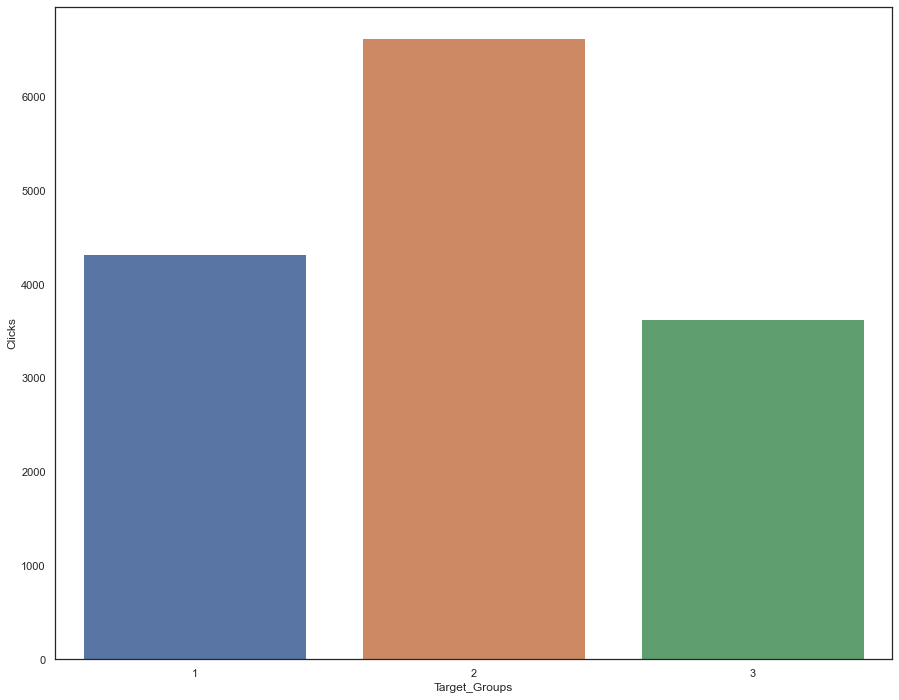

In [20]:
sns.barplot(x='Target_Groups', y='Clicks', data=df3)
plt.show()

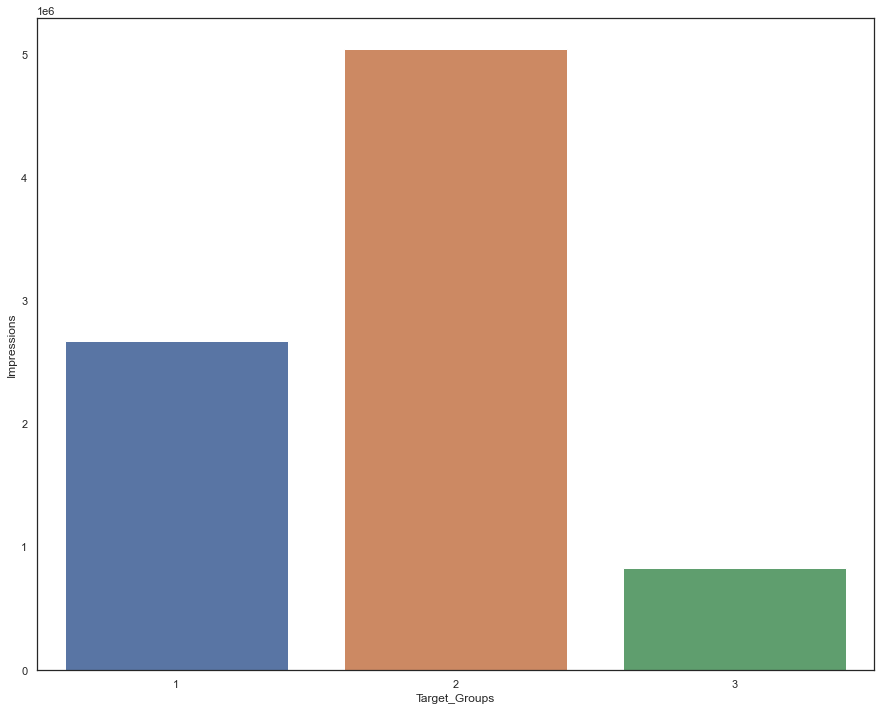

In [21]:
sns.barplot(x='Target_Groups', y='Impressions', data=df3)
plt.show()

In [22]:
# Convert Target Group to integer.
demographics['Target_Groups'] = demographics['Target_Groups'].astype('int')

In [23]:
print(demographics.dtypes)

Requested URL Path                 object
Campaign                           object
Creative - Size                    object
Audience                           object
Ad Format                          object
Date                       datetime64[ns]
Creative - Family                  object
Creative - Version                 object
Platform                           object
Company Name                       object
Impressions                       float64
Clicks                            float64
Days away from max date           float64
Latest report?                      int64
Target_Groups                       int32
dtype: object


In [24]:
# sns.barplot(x='Target_Groups', y='Company Name', data=demographics)
# plt.show()

In [25]:
demographics.to_csv('demographic_cleaned.csv')